In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer

%matplotlib inline
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
plt.rcParams['figure.facecolor'] = 'white'
#pd.set_option('display.max_rows', None)

In [2]:
train = pd.read_csv('Dataset/train.csv')
test = pd.read_csv('Dataset/test.csv')

In [3]:
train.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.00000,58592.000000,58592.000000,58592.000000
mean,0.611246,0.069424,0.469420,18826.858667,1.763722,3.137066,1162.355851,3.626963,5.245443,4.852893,3850.476891,1672.233667,1553.33537,1385.276813,1.759950,0.063968
std,0.414156,0.056721,0.122886,17660.174792,1.136988,1.832641,266.304786,0.483616,0.430353,0.228061,311.457119,112.089135,79.62227,212.423085,1.389576,0.244698
min,0.002735,0.000000,0.288462,290.000000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.00000,1051.000000,0.000000,0.000000
25%,0.210250,0.020000,0.365385,6112.000000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.00000,1185.000000,0.000000,0.000000
50%,0.573792,0.060000,0.451923,8794.000000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.00000,1335.000000,2.000000,0.000000
75%,1.039104,0.110000,0.548077,27003.000000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.00000,1510.000000,3.000000,0.000000
max,1.396641,1.000000,1.000000,73430.000000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.00000,1720.000000,5.000000,1.000000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [5]:
train.isnull().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

In [6]:
train.duplicated().sum()

0

In [7]:
train.nunique()

policy_id                           58592
policy_tenure                       58592
age_of_car                             49
age_of_policyholder                    75
area_cluster                           22
population_density                     22
make                                    5
segment                                 6
model                                  11
fuel_type                               3
max_torque                              9
max_power                               9
engine_type                            11
airbags                                 3
is_esc                                  2
is_adjustable_steering                  2
is_tpms                                 2
is_parking_sensors                      2
is_parking_camera                       2
rear_brakes_type                        2
displacement                            9
cylinder                                2
transmission_type                       2
gear_box                          

In [8]:
print('Shape of train dataset is',train.shape)
print('Shape of test dataset is',test.shape)

Shape of train dataset is (58592, 44)
Shape of test dataset is (39063, 43)


In [9]:
train.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


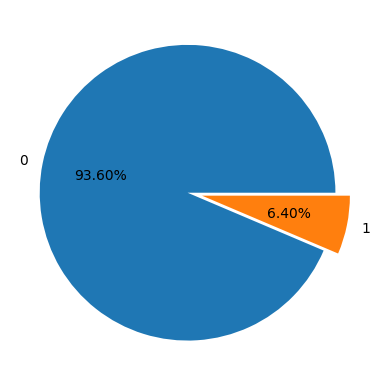

In [10]:
plt.pie(train['is_claim'].value_counts(),labels = train['is_claim'].value_counts().index.tolist(), autopct='%1.2f%%',explode=[0.05]*2)
plt.show()

In [11]:
from tqdm.auto import tqdm
from sklearn import preprocessing
for columns in tqdm(train.columns):
    if dict(train.dtypes)[columns] == 'object':        
        label_encoder = preprocessing.LabelEncoder()
        train[columns] = label_encoder.fit_transform(train[columns])

  0%|          | 0/44 [00:00<?, ?it/s]

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  int32  
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  int32  
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  int32  
 8   model                             58592 non-null  int32  
 9   fuel_type                         58592 non-null  int32  
 10  max_torque                        58592 non-null  int32  
 11  max_power                         58592 non-null  int32  
 12  engi

#### Data Description
* policy_id - Unique identifier of the policyholder
* policy_tenure - Time period of the policy
* age_of_car - Normalized age of the car in years
* age_of_policyholder - Normalized age of policyholder in years
* area_cluster - Area cluster of the policyholder
* population density - Population density of the city (Policyholder City)
* make - Encoded Manufacturer/company of the car
* segment - Segment of the car (A/ B1/B2/ C1/C2)
* model - Encoded name of the car
* fuel_type - Type of fuel used by the car
* max torque - Maximum Torque generated by the car (Nm@rpm)
* max_power - Maximum Power generated by the car (bhp@rpm)
* engine_type - Type of engine used in the car
* airbags - Number of airbags installed in the car
* is_esc - Boolean flag indicating whether Electronic Stability Control (ESC) is present in the car or not.
* is_adjustable_steering - Boolean flag indicating whether the steering wheel of the car is adjustable or not.
* is_tpms - Boolean flag indicating whether Tyre Pressure Monitoring System (TPMS) is present in the car or not.
* is_parking_sensors - Boolean flag indicating whether parking sensors are present in the car or not.
* is_parking_camera - Boolean flag indicating whether the parking camera is present in the car or not.
* rear_brakes_type - Type of brakes used in the rear of the car
* displacement - Engine displacement of the car (cc)
* cylinder - Number of cylinders present in the engine of the car
* transmission_type - Transmission type of the car
* gear_box - Number of gears in the car
* steering_type - Type of the power steering present in the car
* turning_radius - The space a vehicle needs to make a certain turn (Meters)
* length - Length of the car (Millimetre)
* width - Width of the car (Millimetre)
* height - Height of the car (Millimetre)
* gross_weight - The maximum allowable weight of the fully-loaded car, including passengers, cargo and equipment (Kg)
* is_front_fog_lights - Boolean flag indicating whether front fog lights are available in the car or not.
* is_rear_window_wiper - Boolean flag indicating whether the rear window wiper is available in the car or not.
* is_rear_window_washer - Boolean flag indicating whether the rear window washer is available in the car or not.
* is_rear_window_defogger - Boolean flag indicating whether rear window defogger is available in the car or not.
* is_brake_assist - Boolean flag indicating whether the brake assistance feature is available in the car or not.
* is_power_door_lock - Boolean flag indicating whether a power door lock is available in the car or not.
* is_central_locking - Boolean flag indicating whether the central locking feature is available in the car or not.
* is_power_steering - Boolean flag indicating whether power steering is available in the car or not.
* is_driver_seat_height_adjustable - Boolean flag indicating whether the height of the driver seat is adjustable or not.
* is_day_night_rear_view_mirror - Boolean flag indicating whether day & night rearview mirror is present in the car or not.
* is_ecw - Boolean flag indicating whether Engine Check Warning (ECW) is available in the car or not.
* is_speed_alert - Boolean flag indicating whether the speed alert system is available in the car or not.
* ncap_rating - Safety rating given by NCAP (out of 5)
* is_claim - Outcome: Boolean flag indicating whether the policyholder file a claim in the next 6 months or not.

In [13]:
train['volume'] = train.width * train.height * train.length

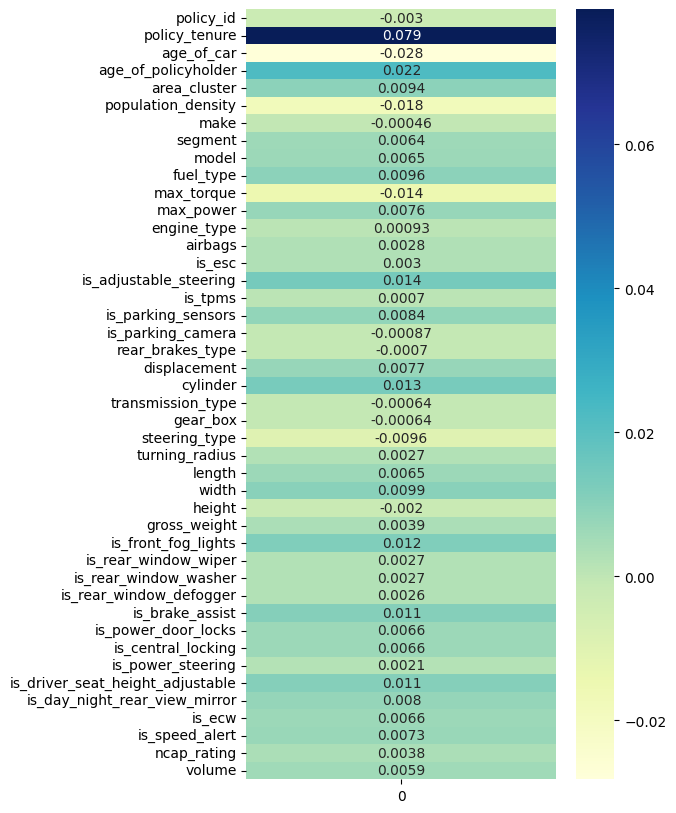

In [14]:
correlation =  train.drop('is_claim',axis=1).corrwith(train['is_claim'])
fig, ax = plt.subplots(figsize=(5,10))      
sns.heatmap(pd.DataFrame(correlation),annot = True,cmap="YlGnBu")
plt.show()

In [15]:
train.drop(['width','height','length'],axis=1,inplace=True)
train.drop('policy_id',axis=1,inplace=True)

<Axes: xlabel='age_of_car'>

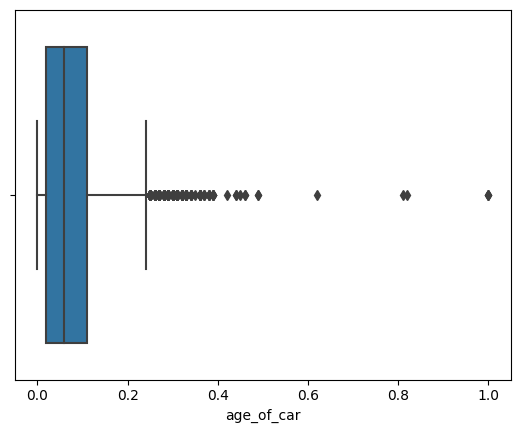

In [16]:
sns.boxplot(x='age_of_car', data=train)

In [17]:
train  = train[train.age_of_car <= train.age_of_car.quantile(0.995)]

In [18]:
train.shape

(58323, 41)

<Axes: xlabel='age_of_car'>

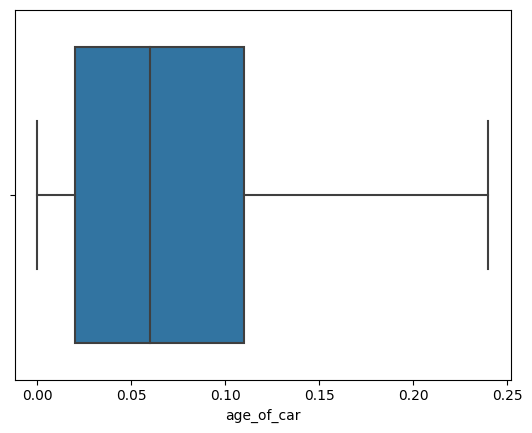

In [19]:
sns.boxplot(x='age_of_car', data=train)

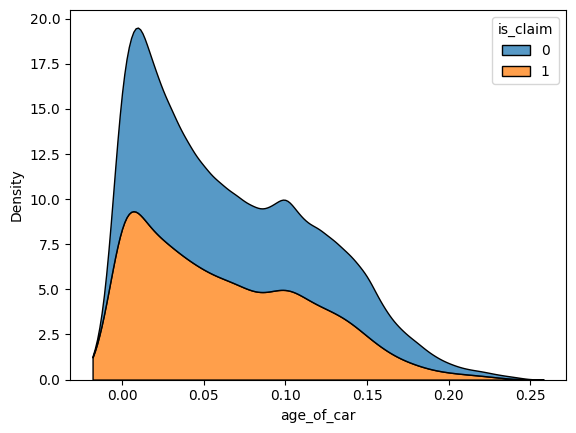

In [20]:
sns.kdeplot(data=train, x="age_of_car", hue="is_claim", multiple="stack", common_norm=False)
plt.show()

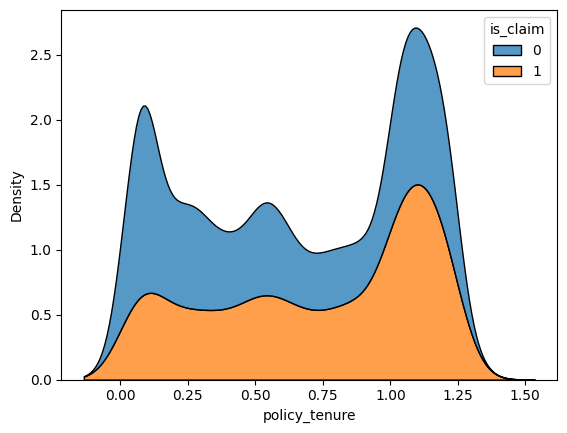

In [21]:
sns.kdeplot(data=train, x="policy_tenure", hue="is_claim", multiple="stack", common_norm=False)
plt.show()

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train[['policy_tenure','gross_weight','area_cluster','population_density','volume']] = scaler.fit_transform(train[['policy_tenure','gross_weight','area_cluster','population_density','volume']])

In [23]:
from sklearn.model_selection import train_test_split


X = train.drop('is_claim', axis = 1)
Y = train['is_claim']


X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42)

## Treating data imbalance with SMOTE

In [24]:
Y_train.value_counts()

0    38236
1     2590
Name: is_claim, dtype: int64

In [25]:
sm = SMOTE(random_state=42)
X_train, Y_train = sm.fit_resample(X_train, Y_train)

imputer = SimpleImputer()
X_train = imputer.fit_transform(X_train)

X_train =  pd.DataFrame(X_train, columns =X.columns)

In [26]:
Y_train.value_counts()

0    38236
1    38236
Name: is_claim, dtype: int64

### Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


log = LogisticRegression(max_iter = 1000)
log.fit(X_train, Y_train)



logi_train_pred = log.predict(X_train)
logi_acc_train = accuracy_score(logi_train_pred, Y_train)
print("Training Accuracy:",logi_acc_train)


logi_test_pred = log.predict(X_test)
logi_acc_test = accuracy_score(logi_test_pred, Y_test)
print("Test Accuracy:",logi_acc_test)

Training Accuracy: 0.5724971231300345
Test Accuracy: 0.5505515231182488


### XGBoost Classifier

In [28]:
from xgboost import XGBClassifier


xgb_model = XGBClassifier()
xgb_model.fit(X_train, Y_train)

xgb_train_pred = xgb_model.predict(X_train)
xgb_acc_train = accuracy_score(xgb_train_pred, Y_train)
print("Training Accuracy:",xgb_acc_train)


xgb_test_pred = xgb_model.predict(X_test)
xgb_acc_test = accuracy_score(xgb_test_pred, Y_test)
print("Test Accuracy:",xgb_acc_test)

Training Accuracy: 0.9637775917983052
Test Accuracy: 0.931931188203692


### Decision Tree Classifier

In [29]:
from sklearn.tree import DecisionTreeClassifier


dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, Y_train)

dtree_train_pred = dtree.predict(X_train)
dtree_acc_train = accuracy_score(dtree_train_pred, Y_train)
print("Training Accuracy:",dtree_acc_train)


dtree_test_pred = dtree.predict(X_test)
dtree_acc_test = accuracy_score(dtree_test_pred, Y_test)
print("Test Accuracy:",dtree_acc_test)

Training Accuracy: 1.0
Test Accuracy: 0.8604332171229354


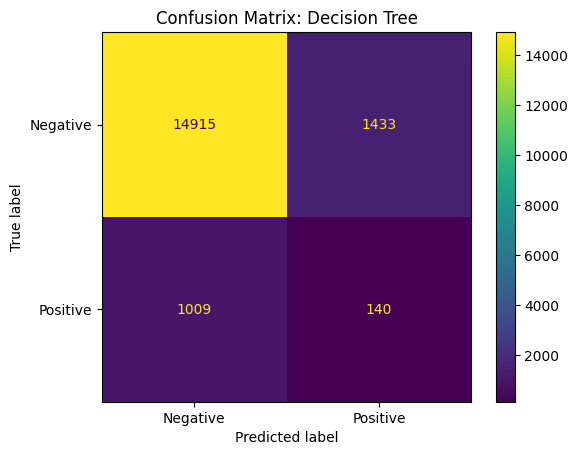

In [30]:
from sklearn import metrics


confusion_matrix = metrics.confusion_matrix(Y_test, dtree_test_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, 
                                            display_labels = ['Negative', 'Positive'])
cm_display.plot()
plt.title('Confusion Matrix: Decision Tree')
plt.show()

In [31]:
from sklearn.metrics import precision_score, recall_score


dtree_recall = recall_score(Y_test,dtree_test_pred)
dtree_precision = precision_score(Y_test, dtree_test_pred)
print("dtreeClassification model's metrics:\n")
print("Accuracy on Training Data:", round(dtree_acc_train, 2))
print("Accuracy on Test Data:", round(dtree_acc_test,2))
print("Recall Score:", round(dtree_recall,2))
print("Precision Score:", round(dtree_precision,2))

dtreeClassification model's metrics:

Accuracy on Training Data: 1.0
Accuracy on Test Data: 0.86
Recall Score: 0.12
Precision Score: 0.09


### Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier


random = RandomForestClassifier()
random.fit(X_train, Y_train)

random_train_pred = random.predict(X_train)
random_acc_train = accuracy_score(random_train_pred, Y_train)
print("Training Accuracy:",random_acc_train)


random_test_pred = random.predict(X_test)
random_acc_test = accuracy_score(random_test_pred, Y_test)
print("Test Accuracy:",random_acc_test)

Training Accuracy: 1.0
Test Accuracy: 0.8762073498313997


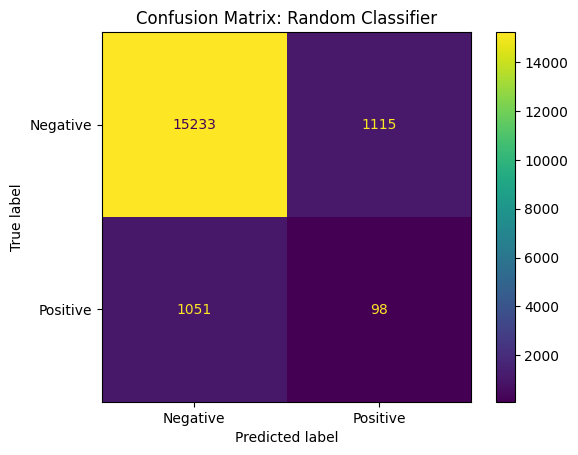

In [33]:
confusion_matrix = metrics.confusion_matrix(Y_test, random_test_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Negative', 'Positive'])
cm_display.plot()
plt.title('Confusion Matrix: Random Classifier')
plt.show()

In [34]:
random_recall = recall_score(Y_test,random_test_pred)
random_precision = precision_score(Y_test, random_test_pred)
print("randomClassification model's metrics:\n")
print("Accuracy on Training Data:", round(random_acc_train, 2))
print("Accuracy on Test Data:", round(random_acc_test,2))
print("Recall Score:", round(random_recall,2))
print("Precision Score:", round(random_precision,2))

randomClassification model's metrics:

Accuracy on Training Data: 1.0
Accuracy on Test Data: 0.88
Recall Score: 0.09
Precision Score: 0.08


### K-nearest Neighbours

In [35]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

knn_train_pred = knn.predict(X_train)
knn_acc_train = accuracy_score(knn_train_pred, Y_train)
print("Training Accuracy:",knn_acc_train)


knn_test_pred = knn.predict(X_test)
knn_acc_test = accuracy_score(knn_test_pred, Y_test)
print("Test Accuracy:",knn_acc_test)


Training Accuracy: 0.8901558740454022
Test Accuracy: 0.7100645824998572


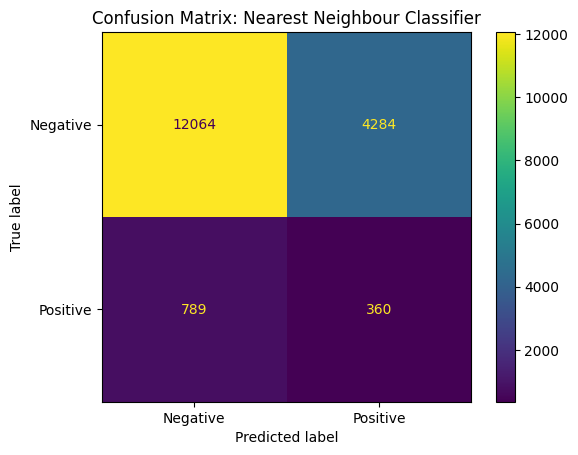

In [36]:
confusion_matrix = metrics.confusion_matrix(Y_test, knn_test_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Negative', 'Positive'])
cm_display.plot()
plt.title('Confusion Matrix: Nearest Neighbour Classifier')
plt.show()

In [37]:
knn_recall = recall_score(Y_test,knn_test_pred)
knn_precision = precision_score(Y_test, knn_test_pred)
print("knnClassification model's metrics:\n")
print("Accuracy on Training Data:", round(knn_acc_train, 2))
print("Accuracy on Test Data:", round(knn_acc_test,2))
print("Recall Score:", round(knn_recall,2))
print("Precision Score:", round(knn_precision,2))

knnClassification model's metrics:

Accuracy on Training Data: 0.89
Accuracy on Test Data: 0.71
Recall Score: 0.31
Precision Score: 0.08


### Voting Ensembles

In [38]:
from sklearn.ensemble import VotingClassifier

rfc = RandomForestClassifier()
dtree = DecisionTreeClassifier()

voting = VotingClassifier(
    estimators=[('random_forest', rfc), ('decision_tree',dtree) ],
    voting='hard')

In [39]:
voting.fit(X_train, Y_train)

VotingClassifier(estimators=[('random_forest', RandomForestClassifier()),
                             ('decision_tree', DecisionTreeClassifier())])

In [40]:
voting_train_pred = voting.predict(X_train)
voting_acc_train = accuracy_score(voting_train_pred, Y_train)
print("Training Accuracy:",voting_acc_train)


voting_test_pred = voting.predict(X_test)
voting_acc_test = accuracy_score(voting_test_pred, Y_test)
print("Test Accuracy:",voting_acc_test)

Training Accuracy: 1.0
Test Accuracy: 0.9139852546150768


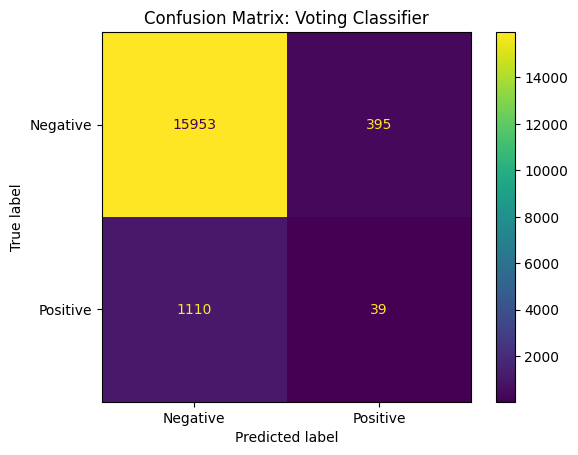

In [41]:

confusion_matrix = metrics.confusion_matrix(Y_test, voting_test_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Negative', 'Positive'])
cm_display.plot()
plt.title('Confusion Matrix: Voting Classifier')
plt.show()

In [42]:
voting_recall = recall_score(Y_test,voting_test_pred)
voting_precision = precision_score(Y_test, voting_test_pred)
print("votingClassification model's metrics:\n")
print("Accuracy on Training Data:", round(voting_acc_train, 2))
print("Accuracy on Test Data:", round(voting_acc_test,2))
print("Recall Score:", round(voting_recall,2))
print("Precision Score:", round(voting_precision,2))

votingClassification model's metrics:

Accuracy on Training Data: 1.0
Accuracy on Test Data: 0.91
Recall Score: 0.03
Precision Score: 0.09


### Feature Importance

In [43]:
columns = X_train.columns

In [44]:
def compute_feature_importance(voting, weights):

    feature_importance = dict()
    for est in voting.estimators_:
        feature_importance[str(est)] = est.feature_importances_
    

    fe_scores = [0]*len(list(feature_importance.values())[0])

    
    for idx, imp_score in enumerate(feature_importance.values()):
        ## print(imp_score)
        imp_score_with_weight = imp_score*weights[idx]
        fe_scores = list(np.add(fe_scores, list(imp_score_with_weight)))
    return fe_scores

In [45]:
dict_voting = dict(zip(columns,np.round(compute_feature_importance(voting, [1/2,1/2]),5)))
voting_imp = pd.DataFrame(dict_voting.items(),columns=['Feature','IMP'])
voting_imp.sort_values('IMP',ascending=False).head(10)

,Feature,IMP
1,age_of_car,0.46480
0,policy_tenure,0.20735
2,age_of_policyholder,0.16940
3,area_cluster,0.06479
4,population_density,0.05945
39,volume,0.00778
7,model,0.00262
19,displacement,0.00259
11,engine_type,0.00227
25,gross_weight,0.00220


In [46]:
columns =  voting_imp.sort_values('IMP',ascending=False).head(10)['Feature'].unique()

In [47]:
X = X[columns]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 1)

### Voting classifer on selected paramters

In [48]:
voting_selected = VotingClassifier(
    estimators=[('random_forest', rfc), ('decision_tree',dtree) ],
    voting='hard')

voting_selected.fit(X_train, Y_train)

voting_selected_train_pred = voting_selected.predict(X_train)
voting_selected_acc_train = accuracy_score(voting_selected_train_pred, Y_train)
print("Training Accuracy:",voting_acc_train)


voting_selected_test_pred = voting_selected.predict(X_test)
voting_selected_acc_test = accuracy_score(voting_selected_test_pred, Y_test)
print("Test Accuracy:",voting_selected_acc_test)


Training Accuracy: 1.0
Test Accuracy: 0.9327903986283754


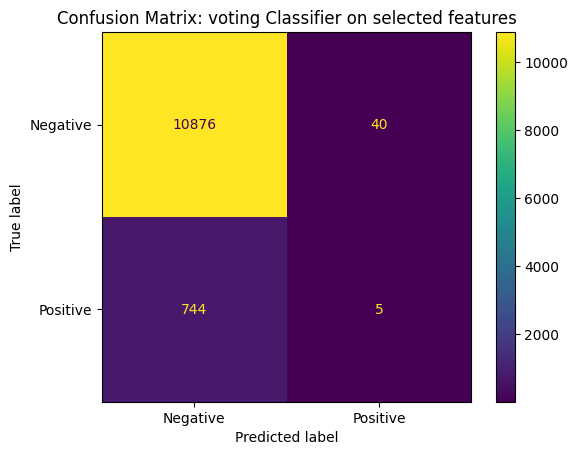

In [49]:

confusion_matrix = metrics.confusion_matrix(Y_test, voting_selected_test_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Negative', 'Positive'])
cm_display.plot()
plt.title('Confusion Matrix: voting Classifier on selected features')
plt.show()

In [50]:
voting_selected_recall = recall_score(Y_test,voting_selected_test_pred)
voting_selected_precision = precision_score(Y_test, voting_selected_test_pred)
print("voting Classification (Selected) model's metrics:\n")
print("Accuracy on Training Data:", round(voting_selected_acc_train, 2))
print("Accuracy on Test Data:", round(voting_selected_acc_test,2))
print("Recall Score:", round(voting_selected_recall,2))
print("Precision Score:", round(voting_selected_precision,2))

voting Classification (Selected) model's metrics:

Accuracy on Training Data: 1.0
Accuracy on Test Data: 0.93
Recall Score: 0.01
Precision Score: 0.11
